## Vector-valued function with Random Fourier Features

### Imports

In [522]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [523]:

dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 300 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = []
for i in range(n):
    y.append(y1[i])
    y.append(y2[i])

y = np.array(y)

lam = 0.000001 # Regularization parameter

### Gaussian Kernel

In [524]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)
print(K)

[[1.         0.         0.9870952  ... 0.         0.99614899 0.        ]
 [0.         1.         0.         ... 0.99757872 0.         0.99614899]
 [0.9870952  0.         1.         ... 0.         0.99717424 0.        ]
 ...
 [0.         0.99757872 0.         ... 1.         0.         0.99980025]
 [0.99614899 0.         0.99717424 ... 0.         1.         0.        ]
 [0.         0.99614899 0.         ... 0.99980025 0.         1.        ]]


#### Alpha

In [525]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)
alpha_

array([[ 1.37840560e+05, -1.59653862e+05, -9.62848907e+04,
        -6.44743329e+03,  5.14925274e+04, -2.48221801e+02,
         2.58880069e+04,  5.60749023e+04, -1.18303735e+04,
         7.02875449e+04, -7.95193063e+04, -1.13625495e+05,
         7.11723875e+04,  6.75580690e+04, -1.42918392e+05,
        -1.02807615e+05, -2.61820010e+04, -9.98294351e+04,
         1.95877277e+04,  9.32934416e+04,  1.18571341e+04,
         1.31389346e+05, -2.86957416e+04, -1.34448002e+05,
         9.87027033e+03, -5.39034771e+04,  5.38036798e+04,
        -5.19574444e+04, -6.84849505e+03,  8.30114383e+04,
         5.14401120e+04, -2.47052296e+04,  1.07510663e+05,
         5.90593919e+04,  1.13794966e+05,  7.76606726e+04,
         6.26199932e+04, -3.59081239e+04, -1.38678950e+05,
        -1.10287148e+05,  1.08948172e+04,  1.22717785e+04,
         4.92058199e+04, -1.91071875e+05,  1.18046587e+05,
         7.45900780e+04,  2.18176436e+04, -8.57000946e+04,
         2.63442261e+05, -3.54376784e+04, -1.18261548e+0

#### Estimated function

In [526]:
def estiamted_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estiamted_function(alpha_, x_vector, n, dimension)
func

array([[1.61646824, 1.33452625, 1.0209498 , 1.12599707, 1.25268773,
        1.02039154, 1.15690455, 1.0222249 , 1.04537676, 1.02345798,
        1.66495027, 1.03964989, 1.14036062, 1.05240639, 1.01907707,
        1.49399353, 1.09765645, 1.2017239 , 1.09470891, 1.63094263,
        1.59741294, 1.13552118, 1.24763342, 1.52954918, 1.65008741,
        1.73068638, 1.24237355, 1.00605393, 1.0321393 , 1.15231222,
        1.61863014, 1.96189259, 1.72268356, 1.16949211, 1.23958685,
        1.16226906, 1.13815958, 1.02694269, 1.28790896, 1.26834743,
        1.06706801, 2.55040135, 1.07138948, 1.09924929, 1.04632629,
        1.03220527, 1.08164071, 1.08833961, 1.14629756, 1.51630091,
        1.15536049, 1.24107725, 1.04735058, 1.07346011, 1.17591835,
        1.00059067, 1.11481011, 1.02740391, 1.63558545, 1.01910077,
        1.03263239, 1.1700133 , 1.06397326, 1.30030441, 1.98977754,
        1.08767004, 1.04991928, 1.19592807, 1.01294547, 1.78455644,
        1.14904192, 1.02344873, 1.22556228, 1.15

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\3810244257.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\3810244257.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


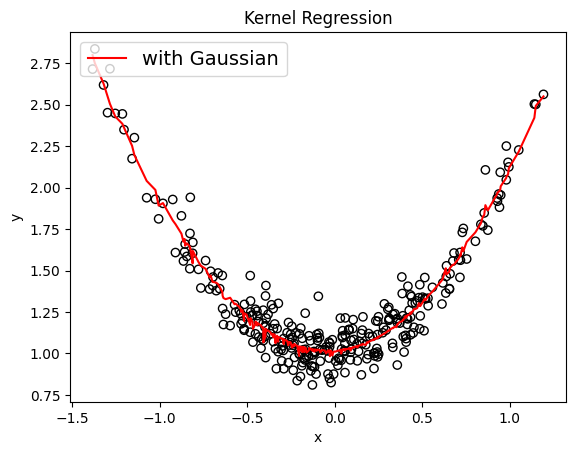

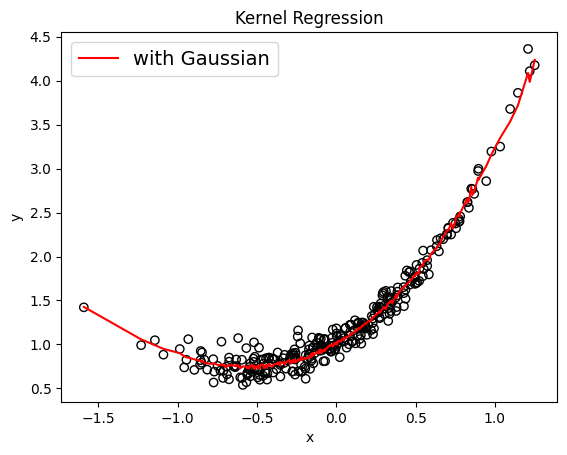

In [527]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])
g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [528]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[-1.22408805, -0.        ,  1.0556821 ,  0.        ,  1.18070937,
         0.        ,  1.09018216,  0.        , -0.72966451, -0.        ,
         1.41250717,  0.        ,  1.071004  ,  0.        , -0.50754053,
        -0.        ,  1.13689763,  0.        ,  1.41372723,  0.        ,
         0.87376947,  0.        ,  0.91354648,  0.        ,  1.40429988,
         0.        ,  1.15864929,  0.        , -0.43750135, -0.        ,
         0.26028755,  0.        ,  1.03719587,  0.        , -1.07411799,
        -0.        ,  0.65686045,  0.        , -0.72409465, -0.        ],
       [-0.        , -1.22408805,  0.        ,  1.0556821 ,  0.        ,
         1.18070937,  0.        ,  1.09018216, -0.        , -0.72966451,
         0.        ,  1.41250717,  0.        ,  1.071004  , -0.        ,
        -0.50754053,  0.        ,  1.13689763,  0.        ,  1.41372723,
         0.        ,  0.87376947,  0.        ,  0.91354648,  0.        ,
         1.40429988,  0.        ,  1.15864929, -0.

#### Phi

In [529]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[-1.10775519, -0.        ,  1.21695357, ...,  0.        ,
        -1.12906686, -0.        ],
       [-0.        , -1.10775519,  0.        , ...,  0.7611842 ,
        -0.        , -1.12906686],
       [-1.22408805, -0.        ,  1.0556821 , ...,  0.        ,
        -0.72409465, -0.        ],
       ...,
       [-0.        , -1.18461165,  0.        , ...,  0.75786031,
        -0.        , -0.97911782],
       [-1.19153511, -0.        ,  1.14620275, ...,  0.        ,
        -0.92974645, -0.        ],
       [-0.        , -1.19153511,  0.        , ...,  0.73472548,
        -0.        , -0.92974645]])

#### Alpha

In [530]:
def alpha_approx(phi, y, n, dim, m, lam):
    alpha = np.linalg.inv(phi.T @ phi + lam*np.eye(dim*m)) @ (phi.T@y)
    return alpha

alpha_approximation = alpha_approx(phi_, y, n, dimension, m, lam)
alpha_approximation.shape

(40,)

#### Function Approximation

In [531]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_approximation(alpha_approximation, x_vector, n, dimension)

array([[1.61354235, 1.33583445, 1.02092656, 1.12940542, 1.25048067,
        1.0212081 , 1.1586846 , 1.0225733 , 1.04716272, 1.02439126,
        1.6679561 , 1.0403136 , 1.13780179, 1.0516032 , 1.01921989,
        1.49224228, 1.10005747, 1.1983405 , 1.09216672, 1.63405312,
        1.59576221, 1.13367665, 1.24645498, 1.53273118, 1.65161509,
        1.72843858, 1.24635135, 1.00653981, 1.03184673, 1.14922817,
        1.62038194, 1.96206472, 1.72420426, 1.17280363, 1.23629041,
        1.15913061, 1.13532904, 1.02834701, 1.28461418, 1.26733657,
        1.06338822, 2.55906473, 1.06979224, 1.10238436, 1.04824345,
        1.0333241 , 1.07943538, 1.08671568, 1.14813959, 1.51522959,
        1.15275651, 1.24161744, 1.04803882, 1.07227485, 1.17360219,
        1.00014296, 1.11232626, 1.02652689, 1.63572741, 1.01804859,
        1.03460505, 1.17300259, 1.06473941, 1.30242952, 1.99135343,
        1.08916209, 1.05148345, 1.19517027, 1.0140606 , 1.78275314,
        1.15126445, 1.02306127, 1.22431055, 1.15